In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
dataset = pd.read_csv('datasets/500_Person_Gender_Height_Weight_Index.csv')
dataset.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
dataset.drop('Index', inplace=True, axis=1)

In [18]:
dataset.shape

(500, 3)

## Central Tendency

In [23]:
mean = dataset.Height.mean()
mean

169.944

In [24]:
median = dataset.Height.median()
median

170.5

In [25]:
mode = dataset.Height.mode()
mode

0    188
dtype: int64

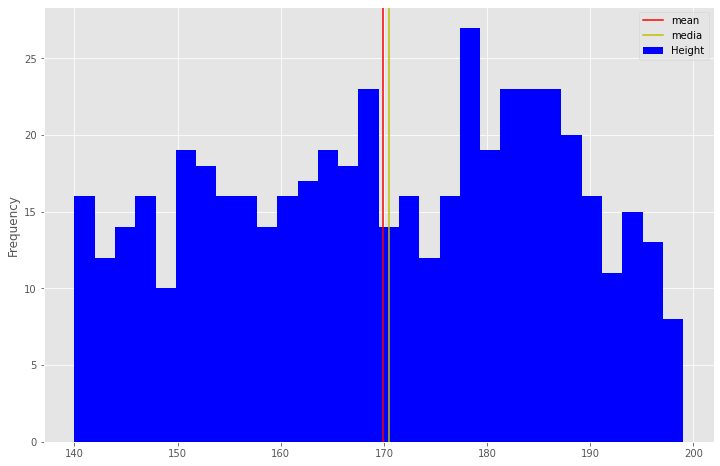

In [27]:
plt.figure(figsize=(12, 8))
dataset.Height.plot.hist(bins=30, color='b')
plt.axvline(mean, color='r', label='mean')
plt.axvline(median, color='y', label='media')
plt.legend()

In [28]:
q1 = dataset.Height.quantile(.25)
q3 = dataset.Height.quantile(.75)
q1, q3

(156.0, 184.0)

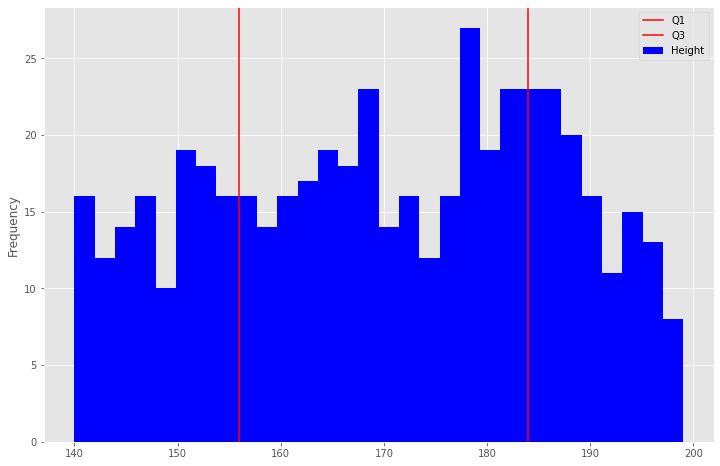

In [30]:
plt.figure(figsize=(12, 8))
dataset.Height.plot.hist(bins=30, color='b')
plt.axvline(q1, color='r', label='Q1')
plt.axvline(q3, color='r', label='Q3')
plt.legend()

## Frequency

In [116]:
weight_groups = dataset.groupby('Weight')

In [117]:
weight_groups.groups

{50: [85, 99, 150, 244, 269, 354, 389, 453, 492], 51: [13, 70, 79, 352], 52: [31, 151, 214, 263, 288], 53: [493], 54: [51, 60, 62, 129, 140, 224, 325, 424], 55: [478], 56: [42, 334, 410, 462], 57: [116, 200, 273, 279, 335], 58: [255, 347, 358, 390], 59: [67, 425, 490], 60: [115, 152, 314, 349, 372], 61: [4, 93, 241, 360, 398, 419, 420], 62: [27, 242, 333, 370, 381, 434], 63: [373], 64: [25, 417, 477], 65: [32, 238, 280, 438, 472], 66: [109, 324, 388], 67: [24, 168, 209, 313, 369], 68: [292, 332, 346, 406], 69: [96, 98, 308], 70: [58, 110, 131, 226, 250, 391, 402, 446], 71: [328, 331, 340, 395], 72: [48, 385], 73: [183, 441], 74: [180, 196, 286, 290], 75: [73, 80, 278], 76: [45, 161, 297, 392], 77: [428, 455], 78: [165, 231, 234], 79: [14, 127, 144, 430, 454, 474], 80: [11, 37, 72, 169, 185, 277, 365, 464, 487], 81: [10, 39, 233, 235, 302, 458], 82: [68, 220, 299], 83: [63, 274, 293, 343, 350, 387, 457], 84: [156, 187, 210, 264], 85: [141, 190, 240, 327, 483], 86: [217, 232, 265, 482], 

In [191]:
frequency = weight_groups['Weight'].agg('count').pipe(pd.DataFrame).rename(columns={'Weight': 'Frequency'}).reset_index()

In [192]:
frequency.tail()

,Weight,Frequency
105,156,6
106,157,3
107,158,3
108,159,4
109,160,6


In [193]:
frequency['Cumulative_Freq'] = frequency.Frequency.cumsum()

In [194]:
frequency.head(10)

,Weight,Frequency,Cumulative_Freq
0,50,9,9
1,51,4,13
2,52,5,18
3,53,1,19
4,54,8,27
5,55,1,28
6,56,4,32
7,57,5,37
8,58,4,41
9,59,3,44


<AxesSubplot:xlabel='Weight'>

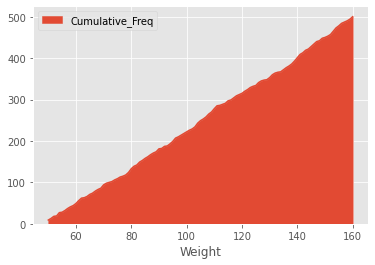

In [207]:
frequency.plot.area(x='Weight', y='Cumulative_Freq')

## Dispersion

In [209]:
dataset.head(10)

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61
5,Male,189,104
6,Male,147,92
7,Male,154,111
8,Male,174,90
9,Female,169,103


In [210]:
dataset.Weight.var()

1048.633266533066

In [211]:
dataset.Weight.std()

32.38260746964435

In [213]:
weight_range = dataset.Weight.max() - dataset.Weight.min()
weight_range

110